In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Input, Dense, Embedding, GlobalMaxPool1D, LSTM
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv


--2024-08-12 14:35:14--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2024-08-12 14:35:14 (10.9 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns = ["label", "texts"]

In [ ]:
df.head()

,label,texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


* Using pre and making truncating is more reliable due to RNN mostly rely on last values

In [ ]:
df["b_labels"] = df["label"].map({"ham": 0, "spam": 1})
Y = df["b_labels"].values
len(Y)

5572

* see, if we use more seq. length than our max seq. length

In [ ]:
df_train, df_test, y_train, y_test = train_test_split(df["texts"], Y, test_size=0.33)

In [ ]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
seq_train = tokenizer.texts_to_sequences(df_train)
seq_test = tokenizer.texts_to_sequences(df_test)


In [ ]:
seq_train

[[3,
  20,
  2328,
  2,
  305,
  4,
  812,
  453,
  107,
  16,
  108,
  140,
  3420,
  2,
  543,
  13,
  453,
  205,
  3,
  20,
  347,
  2,
  305,
  69,
  4,
  752,
  91,
  242],
 [1,
  37,
  409,
  410,
  206,
  49,
  429,
  48,
  151,
  11,
  91,
  15,
  324,
  3,
  2329,
  31,
  11,
  1080,
  23,
  16,
  3,
  3421,
  73,
  42],
 [153,
  1,
  111,
  11,
  880,
  2330,
  87,
  3422,
  50,
  46,
  180,
  117,
  28,
  3,
  31,
  3423,
  17,
  1767,
  184,
  10,
  56,
  7,
  73,
  1768,
  209],
 [144, 153, 7, 11, 1769, 38, 3424, 50, 5, 2331],
 [133, 62, 78, 103, 82, 2, 3425, 1435],
 [11, 36, 9, 3426, 3427, 612, 10, 28, 32, 206, 3428],
 [53, 95, 225, 661, 133],
 [12,
  613,
  430,
  9,
  97,
  91,
  3429,
  431,
  3,
  26,
  21,
  15,
  469,
  454,
  22,
  282,
  1081,
  3,
  230,
  22,
  31,
  753,
  38,
  66,
  79,
  2,
  3430,
  181,
  148,
  156,
  3431,
  202,
  126,
  1246],
 [175,
  8,
  296,
  486,
  236,
  31,
  432,
  25,
  175,
  8,
  432,
  486,
  236,
  168,
  185,
  339,
  3

In [ ]:
data_train = pad_sequences(seq_train)

word2idx = tokenizer.word_index
V = len(word2idx)


In [ ]:
print(f"found number of tokens: {V}")

found number of tokens: 7151


In [ ]:
data_train.shape

(3733, 189)

In [ ]:
T = data_train.shape[1]
data_test = pad_sequences(seq_test, maxlen=T)
data_test.shape

(1839, 189)

In [ ]:
D = 20 # hyperparameter

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = LSTM(10, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["acc"])
hist = model.fit(data_train,
                 y_train,
                 validation_data=(data_test, y_test),
                 epochs=15)

Epoch 1/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - acc: 0.8401 - loss: 0.5316 - val_acc: 0.8651 - val_loss: 0.3203
Epoch 2/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - acc: 0.8720 - loss: 0.2663 - val_acc: 0.9706 - val_loss: 0.1552
Epoch 3/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - acc: 0.9834 - loss: 0.1176 - val_acc: 0.9837 - val_loss: 0.0856
Epoch 4/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - acc: 0.9941 - loss: 0.0525 - val_acc: 0.9859 - val_loss: 0.0700
Epoch 5/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - acc: 0.9949 - loss: 0.0369 - val_acc: 0.9875 - val_loss: 0.0585
Epoch 6/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - acc: 0.9978 - loss: 0.0212 - val_acc: 0.9864 - val_loss: 0.0663
Epoch 7/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - acc: 1.0000 - loss: 0.0128 - val_acc: 0.9869 - val_loss: 0.0600
Epoch 8/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - acc: 1.0000 - loss: 0.0097 - val_acc: 0.9869 - val_loss: 0.0651
Epoch 9/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s

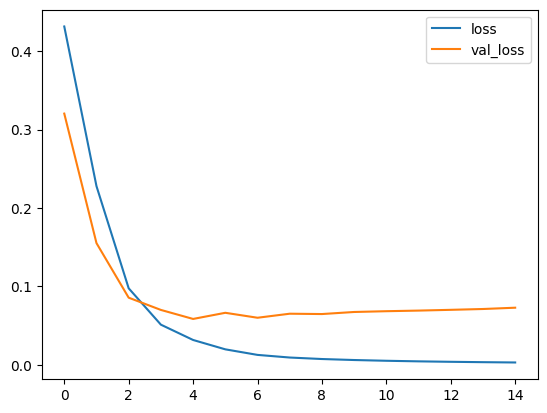

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

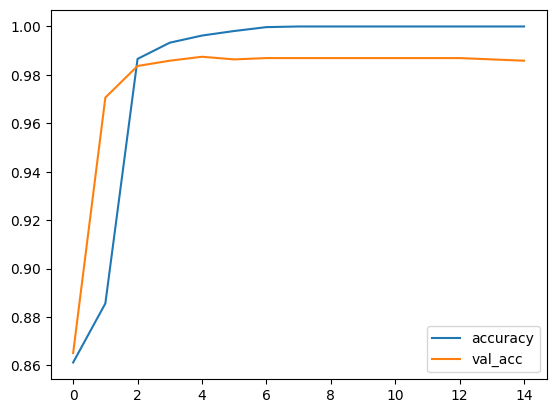

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'], label='accuracy')
plt.plot(hist.history['val_acc'], label='val_acc')
plt.legend()